In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

df = pd.read_csv("C:/Users/vicky/Desktop/ASU/God/DS interview preparation/DS Journey/Week1/data/googleplaystore.csv")
df = df.dropna(subset = ["Rating"])
df['Rating'] = pd.to_numeric(df['Rating'], errors = "coerce")

2. Univariate Visualizations (One Variable)

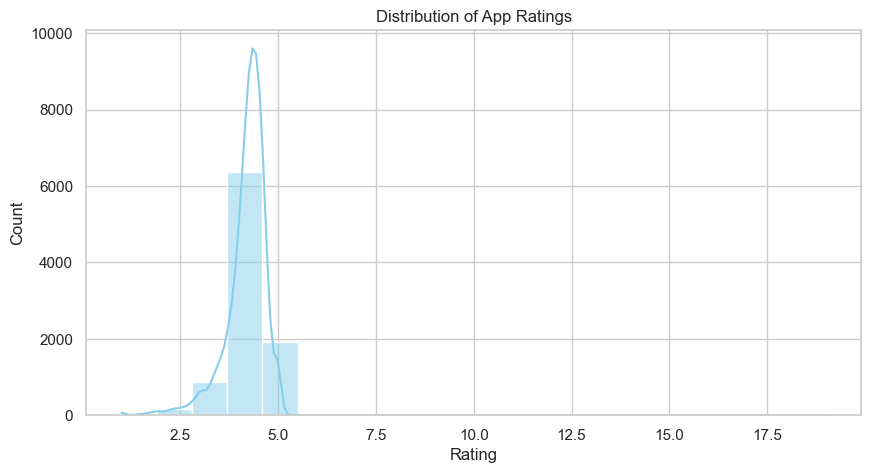

In [6]:
#Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=20, kde = True, color = 'skyblue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

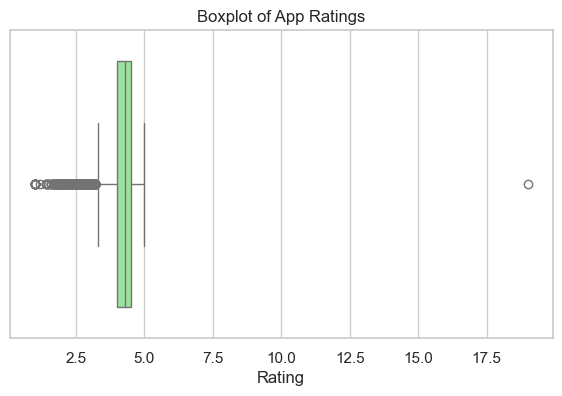

In [8]:
#Boxplot (to spot outliers)
plt.figure(figsize=(7,4))
sns.boxplot(x=df['Rating'], color='lightgreen')
plt.title("Boxplot of App Ratings")
plt.show()

3. Bivariate Visualizations (Compare 2 Variables)

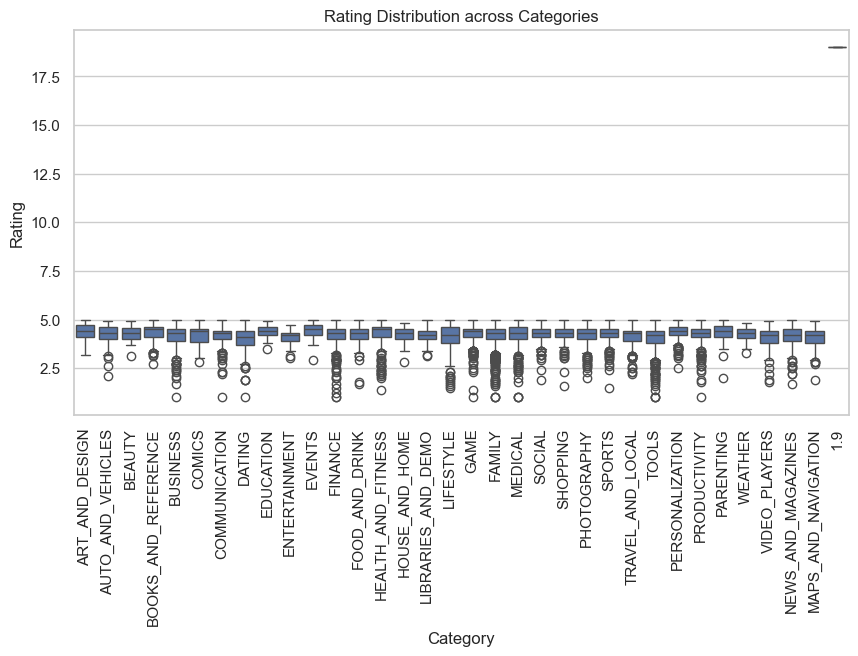

In [11]:
#Category vs Rating
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Category', y='Rating')
plt.xticks(rotation=90)
plt.title("Rating Distribution across Categories")
plt.show()

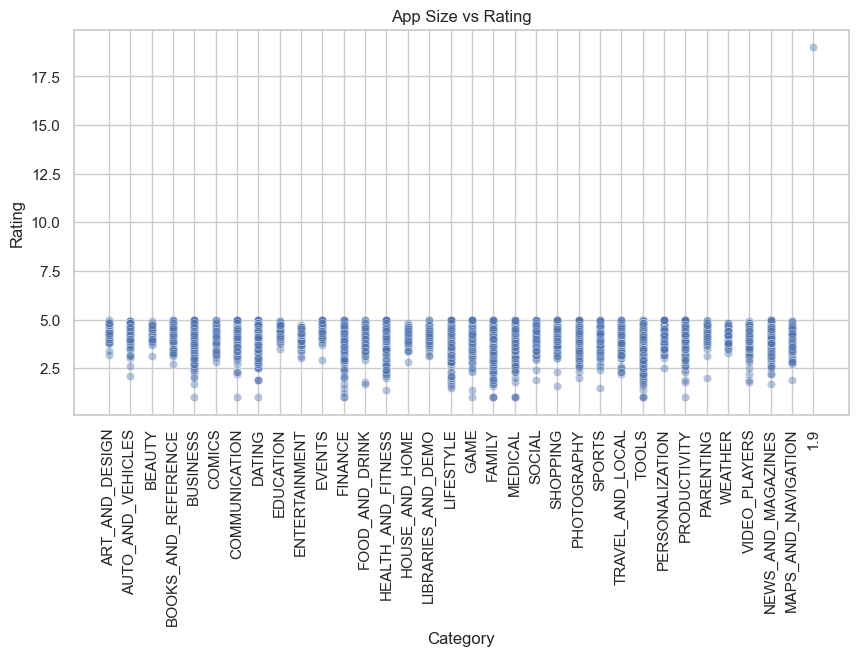

In [ ]:
#Scatter plot (Category vs Rating)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Category',y='Rating',alpha=0.4)
plt.xticks(rotation=90)
plt.title("App Size vs Rating")
plt.show()

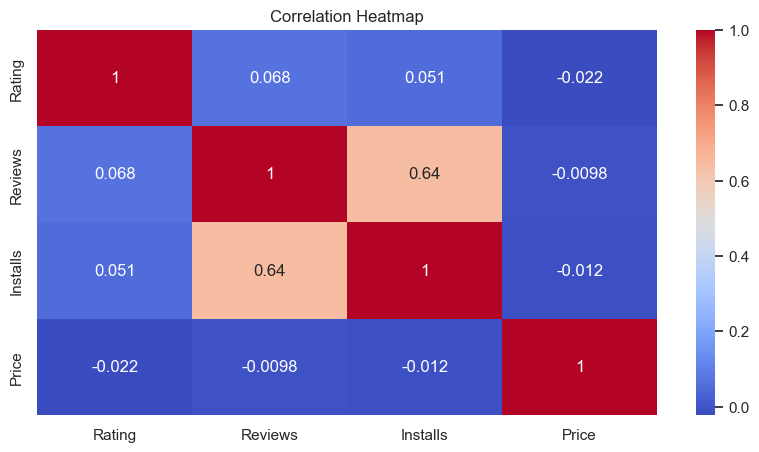

In [31]:
#Correlation Heatmap
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df=df[~df['Price'].astype(str).str.contains('Eveyone',na=False)]

df['Installs'] = (df['Installs']
                  .astype(str)
                  .str.replace('[+,]','',regex=True)
                  .str.replace('Free','',regex=False)
                  .str.replace('Paid','',regex=False)
                  .replace('',np.nan)
                  .astype(float))
df['Price'] = (
    df['Price']
    .astype(str)                                 # ensure string type
    .str.replace('$', '', regex=False)           # remove dollar sign
    .str.replace('Free', '0', regex=False)       # replace 'Free' with 0
    .str.replace('Paid', '', regex=False)
    .replace('', np.nan)
)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
num_df = df.select_dtypes(include=['float64','int64'])
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()